In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Task 2.1

In [60]:
x = np.random.randint(100, size=(100))
x = (x - np.min(x))/np.ptp(x)
x = x.astype(np.float32)
print(x)

[0.96907216 0.9587629  0.5154639  0.6597938  0.31958762 0.52577317
 0.12371134 0.06185567 0.16494845 0.8556701  0.58762884 0.4329897
 0.02061856 0.39175257 0.9381443  0.08247422 0.5463917  0.7628866
 0.49484536 0.7628866  0.28865978 0.91752577 0.7010309  0.96907216
 0.742268   0.52577317 0.39175257 0.8453608  0.20618556 0.8041237
 0.62886596 0.9896907  0.9484536  0.9381443  0.7938144  0.46391752
 0.14432989 0.39175257 0.20618556 0.44329897 0.185567   0.97938144
 0.45360824 0.83505154 0.49484536 0.69072163 0.13402061 0.6185567
 0.92783505 0.04123711 0.68041235 0.7628866  0.41237113 0.78350514
 0.5051546  0.742268   0.4329897  0.24742268 0.24742268 0.814433
 0.9587629  0.6185567  0.9381443  0.48453608 0.44329897 0.7628866
 0.29896906 0.3814433  0.35051546 0.9896907  0.48453608 0.62886596
 0.40206185 0.29896906 0.6597938  0.04123711 0.7113402  0.48453608
 0.17525773 0.742268   0.10309278 0.83505154 0.57731956 0.
 0.9072165  0.82474226 0.4742268  0.8659794  0.7628866  0.73195875
 0.4948453

In [61]:
def function(x_):
    return x_**3-x_**2
    
myfunc_vec = np.vectorize(function)
t = myfunc_vec(x)

print(t)

[-0.02904436 -0.03790624 -0.12874271 -0.14810124 -0.06949477 -0.13109404
 -0.01341116 -0.00358946 -0.02272007 -0.10567422 -0.14239492 -0.10630313
 -0.00041636 -0.09334778 -0.05444009 -0.00624101 -0.13542199 -0.13799905
 -0.12369819 -0.13799905 -0.05927205 -0.06943122 -0.14692667 -0.02904436
 -0.14200048 -0.13109404 -0.09334778 -0.11051056 -0.03374703 -0.12665654
 -0.14677327 -0.01009781 -0.04636929 -0.05444009 -0.12992606 -0.11537539
 -0.01782456 -0.09334778 -0.03374703 -0.10939953 -0.02804509 -0.01977707
 -0.11242581 -0.11502039 -0.12369819 -0.14755559 -0.01555431 -0.14594493
 -0.06212521 -0.00163038 -0.14795661 -0.13799905 -0.09992626 -0.13290193
 -0.12627523 -0.14200048 -0.10630313 -0.04607127 -0.04607127 -0.12308681
 -0.03790624 -0.14594493 -0.05444009 -0.12101815 -0.10939953 -0.13799905
 -0.0626599  -0.08999937 -0.07979638 -0.01009781 -0.12101815 -0.14677327
 -0.09665893 -0.0626599  -0.14810124 -0.00163038 -0.14606327 -0.12101815
 -0.02533218 -0.14200048 -0.00953244 -0.11502039 -0

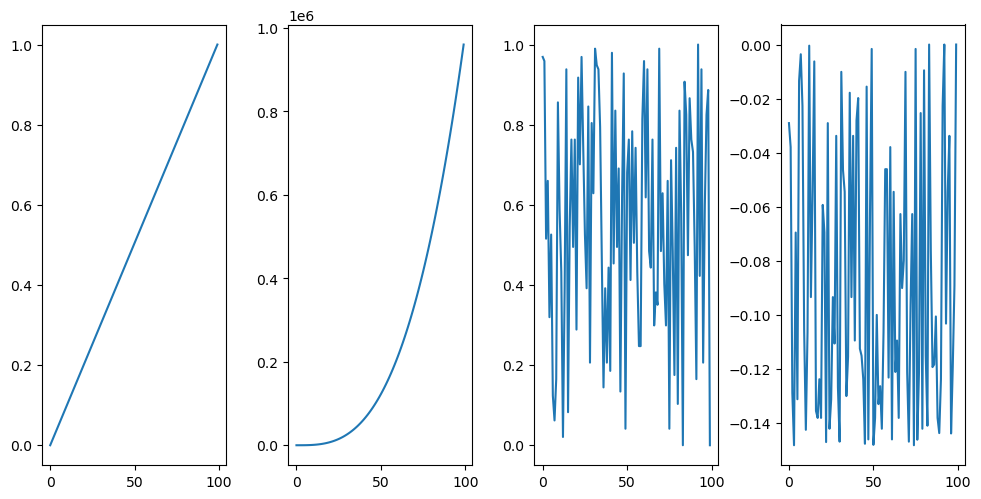

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,5))
plt.tight_layout()
axes[0].plot(np.linspace(0,1,100))
axes[1].plot(myfunc_vec(np.arange(0,100)))
axes[2].plot(x)
axes[3].plot(t)

# Task 2.2

In [109]:
class Layer:
    def __init__(self, input_units, n_units):
        self.weights = np.random.randn(input_units, n_units)
        self.bias    = np.zeros((1, n_units))

    def forward_step(self, x):
    
        self.input = x
        
        # save calculated outout
        self.preactivation = self.input @ self.weights + self.bias # output
        
        # apply relu
        self.activation = np.maximum(self.preactivation, 0)
        
        return self.activation

    def backward_step(self,in_gradient):
        
        # print shapes
#         print(f"Weights: {self.input.T.shape} @ ({self.preactivation.shape} * {in_gradient.T.shape}")
#         print(f"Bias: {self.preactivation.shape} * {in_gradient.T.shape}")"
#         print(f"Input_grads: {self.preactivation.shape} * {in_gradient.T.shape} @ {self.weights.T.shape}")
        
        ReLU_deriv = 1 * (self.preactivation > 0)
#         print(ReLU_deriv.shape)
#         print(in_gradient.shape)
        #ReLU_deriv = self.preactivation
    
        # get gradient wrt. weights
        weight_grads = self.input.T @ (ReLU_deriv * in_gradient)
        
        # get gradient wrt. biases
        bias_grads = (ReLU_deriv * in_gradient)
        
        # get gradient wrt. input
        input_grads = (ReLU_deriv * in_gradient) @ self.weights.T   

        # update step
        self.weights = self.weights - 0.2 * weight_grads
        self.bias = self.bias - 0.2 * bias_grads
        
        return input_grads

In [110]:
class Model:
    def __init__(self, components) -> None:
        self.components = components

    def forward_step(self, x):
    
        out = self.components[1].forward_step(x)
        out_final = self.components[0].forward_step(out)
        
        return out_final
        
    def backward(self):
        
        final_layer_grad = (self.y_pred-self.y_true)
        #print(f"MSE Grad: {final_layer_grad}")
        layer2_grad = self.components[0].backward_step(final_layer_grad)
        #print(f"Layer2 Grad: {layer2_grad}")
        layer1_grad = self.components[1].backward_step(layer2_grad)
    
    def loss(self,y_true,y_pred):
        
        self.y_true = y_true
        self.y_pred = y_pred
        
        return 0.5*(y_pred-y_true)**2
    

In [111]:
layer1 = Layer(1,10)
layer2 = Layer(10,1)

m = Model([layer2, layer1])

In [113]:
loss = []

for epoch in range (0,1000):
    
    running_loss = 0
    
    for idx, datapoint in enumerate(x):        
        #print(f"sample: {np.broadcast_to(datapoint,(1,))}")
        #print(f"Real: {np.broadcast_to(t[idx],(1,))}")
        # fwp
        out = m.forward_step(np.broadcast_to(datapoint,(1,)))
        #print(f"Output: {out}")
        
        # update loss
        running_loss += m.loss(t[idx],out)
        #print(f"Loss: {running_loss}")
        
        # bwp
        m.backward()
        
#         if idx > 2:
#             break
    
    loss.append((running_loss/len(x))[0])
    print(f"Loss in Epoch {epoch+1}: {(running_loss/len(x))[0]}")
    #break
    
print("Training finished")

Loss in Epoch 1: [0.00504148]
Loss in Epoch 2: [0.00504148]
Loss in Epoch 3: [0.00504148]
Loss in Epoch 4: [0.00504148]
Loss in Epoch 5: [0.00504148]
Loss in Epoch 6: [0.00504148]
Loss in Epoch 7: [0.00504148]
Loss in Epoch 8: [0.00504148]
Loss in Epoch 9: [0.00504148]
Loss in Epoch 10: [0.00504148]
Loss in Epoch 11: [0.00504148]
Loss in Epoch 12: [0.00504148]
Loss in Epoch 13: [0.00504148]
Loss in Epoch 14: [0.00504148]
Loss in Epoch 15: [0.00504148]
Loss in Epoch 16: [0.00504148]
Loss in Epoch 17: [0.00504148]
Loss in Epoch 18: [0.00504148]
Loss in Epoch 19: [0.00504148]
Loss in Epoch 20: [0.00504148]
Loss in Epoch 21: [0.00504148]
Loss in Epoch 22: [0.00504148]
Loss in Epoch 23: [0.00504148]
Loss in Epoch 24: [0.00504148]
Loss in Epoch 25: [0.00504148]
Loss in Epoch 26: [0.00504148]
Loss in Epoch 27: [0.00504148]
Loss in Epoch 28: [0.00504148]
Loss in Epoch 29: [0.00504148]
Loss in Epoch 30: [0.00504148]
Loss in Epoch 31: [0.00504148]
Loss in Epoch 32: [0.00504148]
Loss in Epoch 33:

Loss in Epoch 918: [0.00504148]
Loss in Epoch 919: [0.00504148]
Loss in Epoch 920: [0.00504148]
Loss in Epoch 921: [0.00504148]
Loss in Epoch 922: [0.00504148]
Loss in Epoch 923: [0.00504148]
Loss in Epoch 924: [0.00504148]
Loss in Epoch 925: [0.00504148]
Loss in Epoch 926: [0.00504148]
Loss in Epoch 927: [0.00504148]
Loss in Epoch 928: [0.00504148]
Loss in Epoch 929: [0.00504148]
Loss in Epoch 930: [0.00504148]
Loss in Epoch 931: [0.00504148]
Loss in Epoch 932: [0.00504148]
Loss in Epoch 933: [0.00504148]
Loss in Epoch 934: [0.00504148]
Loss in Epoch 935: [0.00504148]
Loss in Epoch 936: [0.00504148]
Loss in Epoch 937: [0.00504148]
Loss in Epoch 938: [0.00504148]
Loss in Epoch 939: [0.00504148]
Loss in Epoch 940: [0.00504148]
Loss in Epoch 941: [0.00504148]
Loss in Epoch 942: [0.00504148]
Loss in Epoch 943: [0.00504148]
Loss in Epoch 944: [0.00504148]
Loss in Epoch 945: [0.00504148]
Loss in Epoch 946: [0.00504148]
Loss in Epoch 947: [0.00504148]
Loss in Epoch 948: [0.00504148]
Loss in 

Text(0.5, 1.0, 'Average Loss per Epoch')

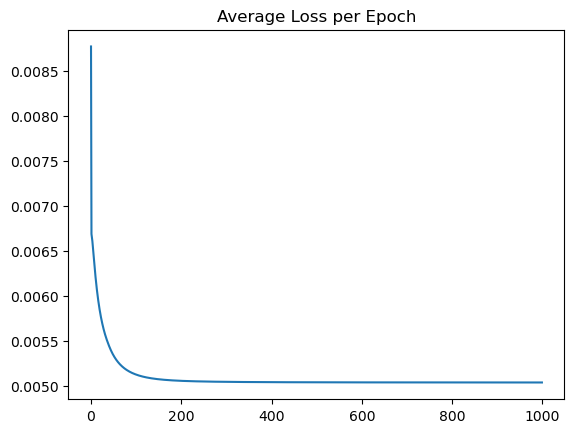

In [107]:
plt.plot(loss)
plt.title("Average Loss per Epoch")

(0.0, 1000000.0)

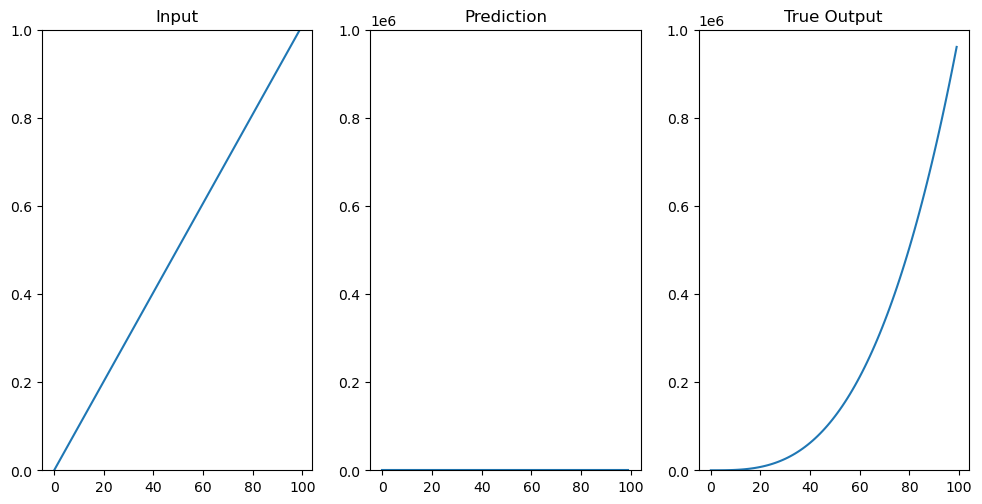

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
plt.tight_layout()

plot = []

for point in np.linspace(0,1,100):
    out = m.forward_step(np.broadcast_to(point,(1,)))
    plot.append(out[0])
    
axes[0].plot(np.linspace(0,1,100))
axes[0].set_title("Input")
axes[0].set_ylim(0,1)
axes[1].plot(plot)
axes[1].set_title("Prediction")
axes[1].set_ylim(0,1000000)
axes[2].plot(myfunc_vec(np.arange(0,100)))
axes[2].set_title("True Output")
axes[2].set_ylim(0,1000000)

In [101]:
# array_deriv = np.random.binomial(5, 0.05, (10,10))
# array_grad = np.random.random((10,10))
# print(array_deriv)
# print(array_grad)

# print(array_deriv*array_grad)

[[0 0 1 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 1 2 1 1]
 [0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 1]
 [0 0 0 0 0 1 0 0 0 0]]
[[0.2073541  0.91645636 0.34807512 0.0231579  0.08957754 0.40073882
  0.94679493 0.81743576 0.50819357 0.24193612]
 [0.41732136 0.43907495 0.05674854 0.82380234 0.86104885 0.00108033
  0.22136577 0.82580399 0.01039196 0.85556738]
 [0.93197689 0.39006907 0.03108272 0.22115254 0.09756231 0.08963521
  0.12228914 0.87786378 0.76587052 0.37505069]
 [0.2123235  0.20800852 0.81572834 0.31741135 0.04657805 0.6100591
  0.64992009 0.63941983 0.80251227 0.65775448]
 [0.80793121 0.83238873 0.41298281 0.28396928 0.39499935 0.43812947
  0.2492934  0.41376544 0.2802577  0.5217884 ]
 [0.50433695 0.89933082 0.40662176 0.46512111 0.35038837 0.29485691
  0.31651384 0.98657085 0.51425116 0.48783616]
 [0.93262277 0.19585191 0.27463809 0.55039829 0.5924323  0.78061522
  0.1848026 